In [14]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import os
import numpy as np

In [15]:
os.getcwd()

'c:\\promise\\bicle'

In [25]:
train =pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')
train=pd.DataFrame(train)


In [26]:
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [27]:
test.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459


In [28]:
train.set_index('date_time')

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
date_time,,,,,,,,,
2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833
...,...,...,...,...,...,...,...,...,...
2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150
2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001
2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568


In [29]:
train['avg temp']=(train['high_temp']+train['low_temp'])/2

array([[<AxesSubplot:title={'center':'number_of_rentals'}>,
        <AxesSubplot:title={'center':'precipitation_form'}>]],
      dtype=object)

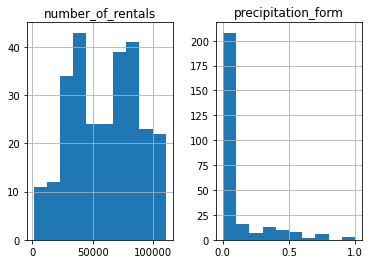

In [30]:
train[['precipitation_form','number_of_rentals']].hist()

In [31]:
corr= (train.corr)

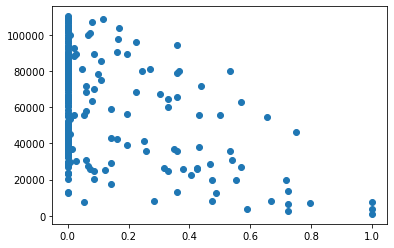

In [35]:


plt.pyplot.scatter(train['precipitation_form'],train['number_of_rentals'])

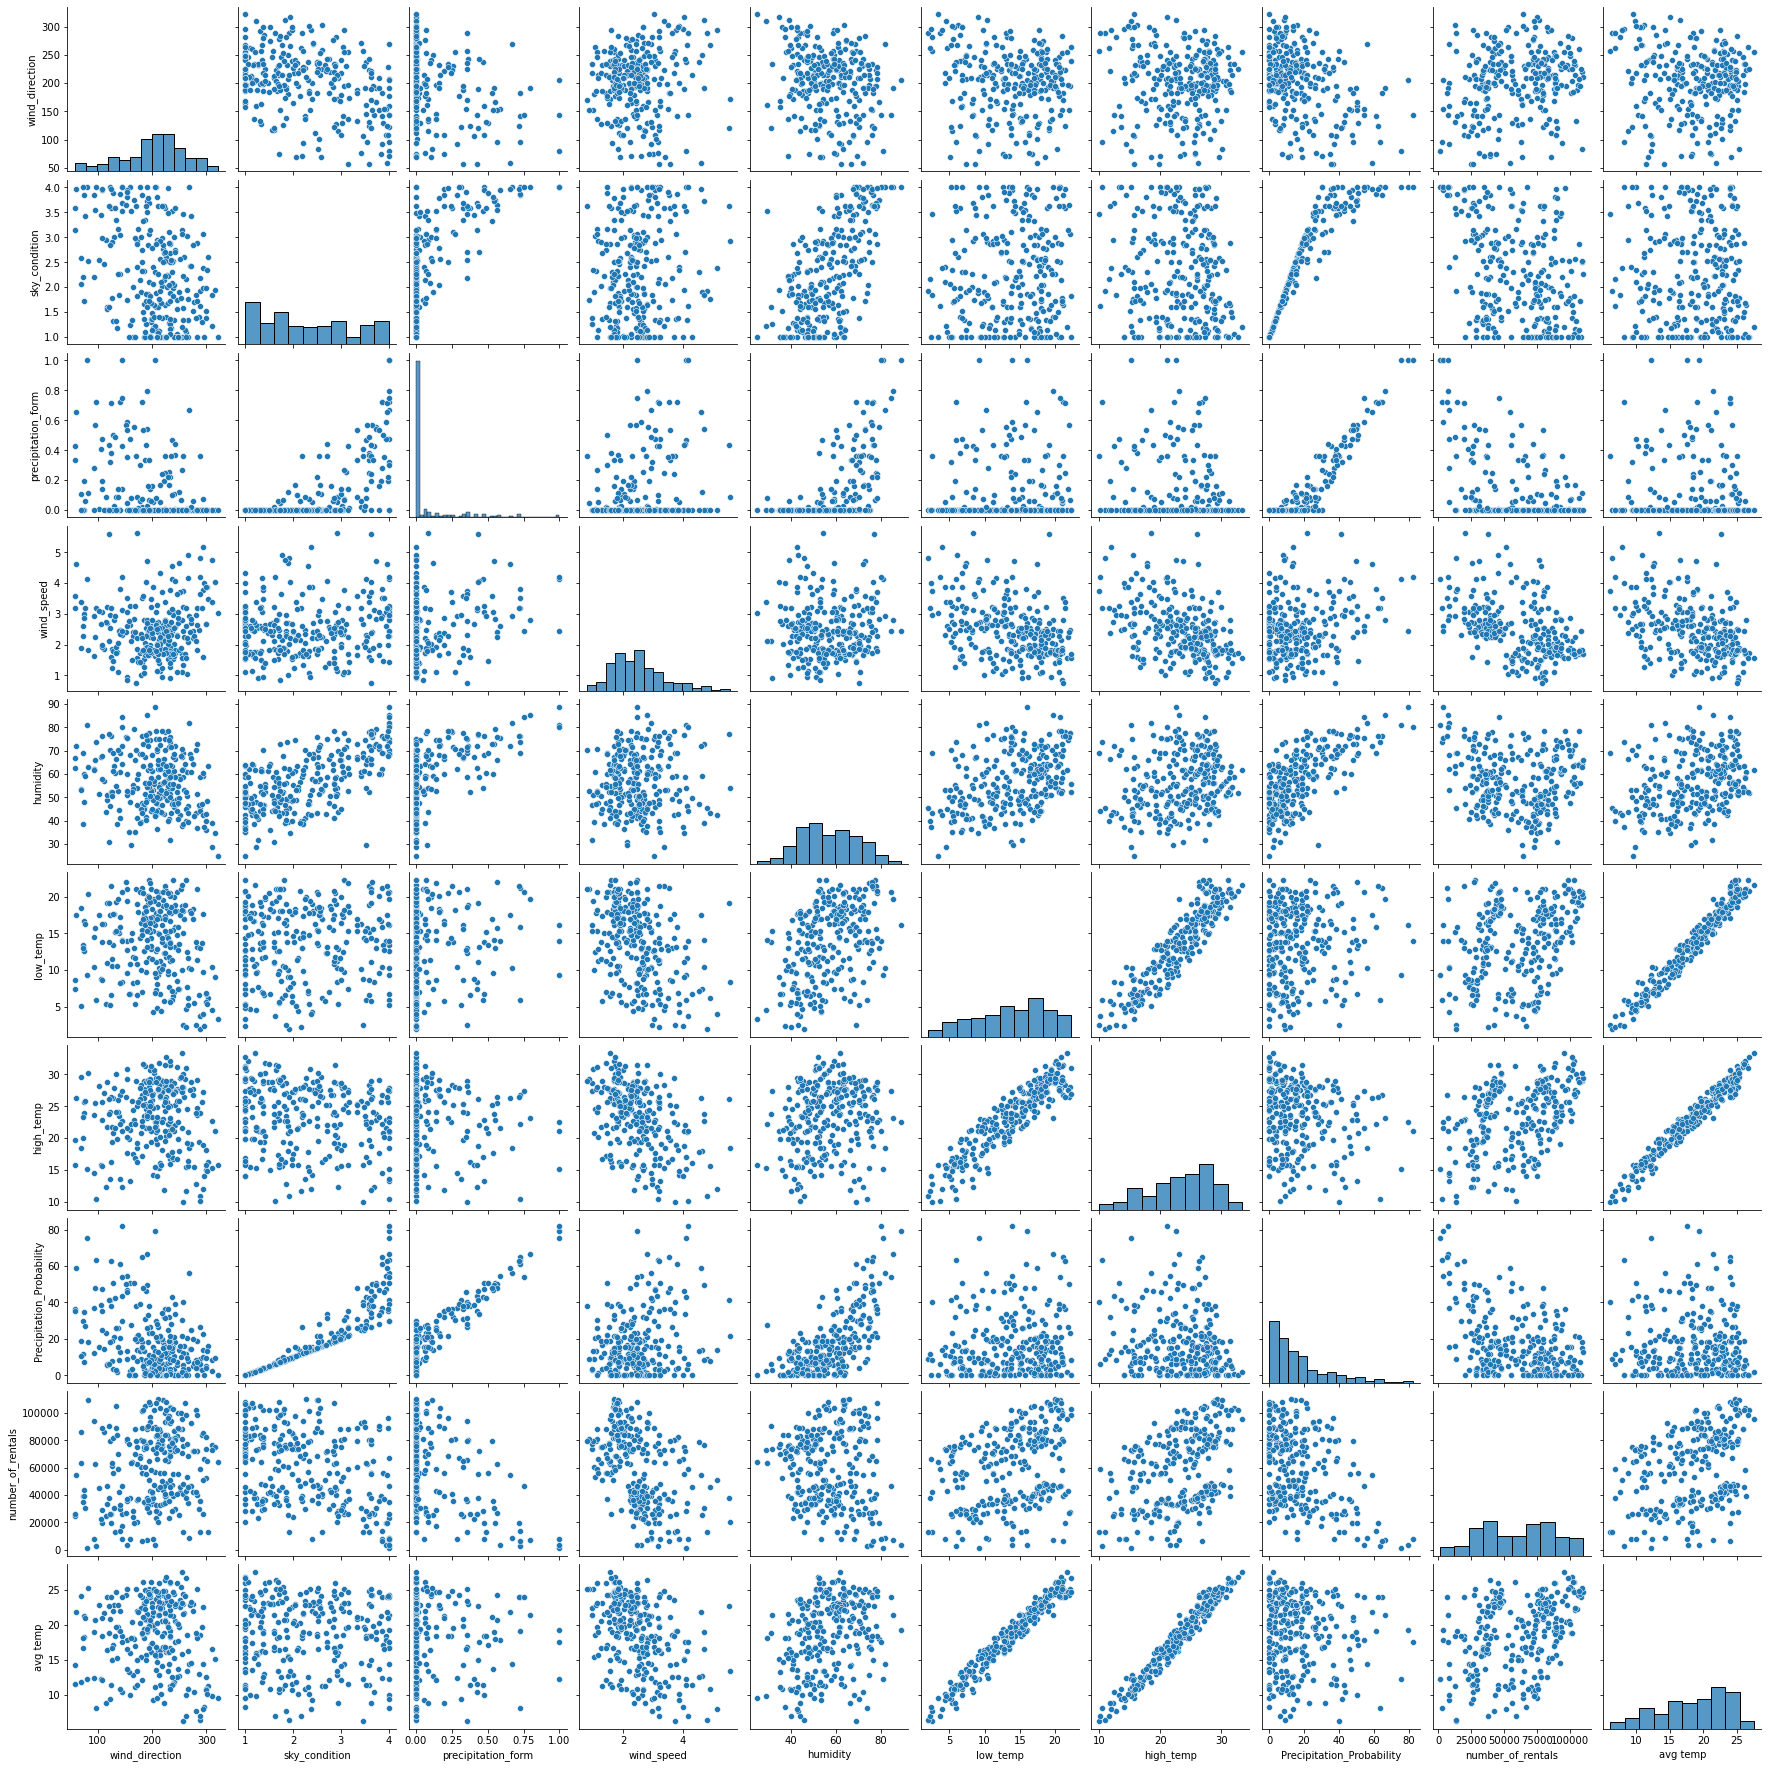

In [36]:
corr=sns.pairplot(train)

In [37]:
# Regression 시작
## https://yjinheon.github.io/2021/06/08/ML-simple-regression/
import numpy as np
X, Y = train["avg temp"], train["number_of_rentals"]

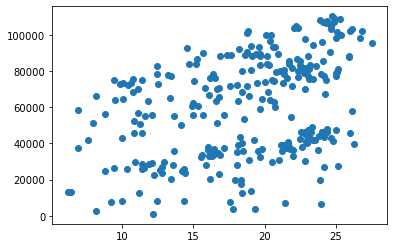

In [38]:

import matplotlib.pyplot as plt
plt.scatter(X, Y)

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [42]:
y_mean= Y.mean()
errors = Y-y_mean
mae= errors.abs().mean()


In [43]:
model.fit(X.values.reshape(-1,1),Y)

LinearRegression()

In [45]:
print(f'회귀식의 기울기는 {model.coef_}입니다.')
print(f'회귀식의 절편(beta_0)은 {model.intercept_}입니다.')

회귀식의 기울기는 [2072.10191285]입니다.
회귀식의 절편(beta_0)은 21054.622437378785입니다.


In [47]:
Y.describe()

count       273.000000
mean      59574.978022
std       27659.575774
min        1037.000000
25%       36761.000000
50%       63032.000000
75%       81515.000000
max      110377.000000
Name: number_of_rentals, dtype: float64

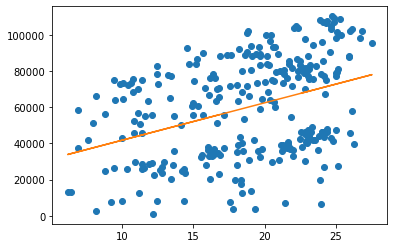

In [48]:
plt.plot(X,Y,'o')
plt.plot(X, model.predict(X.values.reshape(-1,1)))
plt.show()

In [49]:
test["avrg_temp"] = (test["high_temp"]+test["low_temp"])/2
x = test["avrg_temp"]
x.head().sort_values(ascending=False)

0    16.2335
1    15.5000
4    12.9360
2    12.6215
3    11.8090
Name: avrg_temp, dtype: float64

In [50]:
test_yhat=2072*x+21055

submission['number_of_rentals']=test_yhat
submission.to_csv('sample_submission.csv',index=False)


In [51]:
len(test_yhat)

91

In [55]:
# 예측값(test_yhat)과 Train 데이터 간의 평균적 차이 수준
np.mean(test_yhat/train['number_of_rentals'][:91])

3.3380887638402665

<AxesSubplot:>

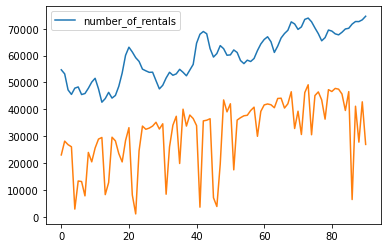

In [56]:
submission.plot()
train["number_of_rentals"][:91].plot()

In [57]:
submission.to_csv('sample_submission3.csv', index= False)